# Inteligencia Artificial 2024/25
## Belén Díaz Agudo -  Facultad de Informática UCM
## Búsqueda local
En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización. 
En la segunda parte de la práctica se pide resolver el problema dado en el enunciado.

## Algoritmo de escalada
Hill Climbing es un algoritmo de búsqueda local heurística utilizada para problemas de optimización.
Esta solución puede o no ser el óptimo global. El algoritmo es una variante del algoritmo de generación y prueba.
<br>
En general, el algoritmo funciona de la siguiente manera:
- Evaluar el estado inicial.
- Si es igual al estado del objetivo, terminamos.
- Encuentra un estado vecino al estado actual
- Evaluar este estado. Si está más cerca del estado objetivo que antes, reemplace el estado inicial con este estado y repita estos pasos.
<br>

    Usaremos la implementación de AIMA que está en el módulo search.py
    def hill_climbing(problem):
        """From the initial node, keep choosing the neighbor with highest value,
        stopping when no neighbor is better. [Figure 4.2]"""
        current = Node(problem.initial)
        while True:
            neighbors = current.expand(problem)
            if not neighbors:
                break
            neighbor = argmax_random_tie(neighbors,
                                        key=lambda node: problem.value(node.state))
            if problem.value(neighbor.state) <= problem.value(current.state):
                break
            current = neighbor
        return current.state



In [13]:
from utils import *
from search import *

In [14]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]
grid = [[0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.80, 1.90, 1.90, 1.80, 1.70, 1.60, 1.50, 0.00],
        [0.00, 1.90, 1.95, 0.40, 0.40, 0.00, 1.65, 0.00, 0.00],
        [0.00, 0.00, 0.00, 2.00, 0.00, 0.00, 2.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 3.00, 0.00, 3.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 7.00, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 7.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]

In [15]:
# Pre-defined actions for PeakFindingProblem
directions4 = { 'W':(-1, 0), 'N':(0, 1), 'E':(1, 0), 'S':(0, -1) }
directions8 = dict(directions4) 
directions8.update({'NW':(-1, 1), 'NE':(1, 1), 'SE':(1, -1), 'SW':(-1, -1) })

class PeakFindingProblem(Problem):
    """Problem of finding the highest peak in a limited grid"""

    def __init__(self, initial, grid, defined_actions=directions4):
        """The grid is a 2 dimensional array/list whose state is specified by tuple of indices"""
        Problem.__init__(self, initial)
        self.grid = grid
        self.defined_actions = defined_actions
        self.n = len(grid)
        assert self.n > 0
        self.m = len(grid[0])
        assert self.m > 0

    def actions(self, state):
        """Returns the list of actions which are allowed to be taken from the given state"""
        allowed_actions = []
        for action in self.defined_actions:
            next_state = vector_add(state, self.defined_actions[action])
            if next_state[0] >= 0 and next_state[1] >= 0 and next_state[0] <= self.n - 1 and next_state[1] <= self.m - 1:
                allowed_actions.append(action)

        return allowed_actions

    def result(self, state, action):
        """Moves in the direction specified by action"""
        return vector_add(state, self.defined_actions[action])

    def value(self, state):
        """Value of a state is the value it is the index to"""
        x, y = state
        assert 0 <= x < self.n
        assert 0 <= y < self.m
        return self.grid[x][y]


In [16]:
problem = PeakFindingProblem(initial, grid, directions4)

In [17]:
def hill_climbing(problem):
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state

In [18]:
solution = problem.value(hill_climbing(problem))
solution

1.95

# Enfriamiento simulado ( simulated annealing) 
El algoritmo de enfriamiento simulado puede manejar las situaciones de óptimo local o mesetas típicas en algoritmos de escalada.
<br>
El enfriamiento simulado es bastante similar a la escalada pero en lugar de elegir el mejor movimiento en cada iteración, elige un movimiento aleatorio. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado,
pero si no lo hace, el algoritmo puede aceptar o rechazar el movimiento en función de una probabilidad dictada por la temperatura.  Cuando la `temperatura` es alta, es más probable que el algoritmo acepte un movimiento aleatorio incluso si es malo. A bajas temperaturas, solo se aceptan buenos movimientos, con alguna excepción ocasional.
Esto permite la exploración del espacio de estado y evita que el algoritmo se atasque en el óptimo local.

    Usaremos la implementación de AIMA del modulo search.py
    
    def simulated_annealing(problem, schedule=exp_schedule()):
    """[Figure 4.5] CAUTION: This differs from the pseudocode as it
    returns a state instead of a Node."""
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e > 0 or probability(math.exp(delta_e / T)):
            current = next_choice

Como hemos visto en clase hay varios métodos de enfriamiento (scheduling routine) Se puede variar el método de enfriamiento. En la implementación actual estamos usando el método de enfriamiento exponencial (que se pasa como parámetro).

    def exp_schedule(k=20, lam=0.005, limit=100):
        """One possible schedule function for simulated annealing"""
        return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

In [19]:
#Resolvemos el problema del máximo en una rejilla con enfriamiento simulado

solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
max(list(solutions))

11.2

### Ejercicio 1.  Resuelve el problema anterior de encontrar el punto máximo en una rejilla. Comenta y razona los resultados obtenidos en distintas rejillas con el algoritmo de escalada por máxima pendiente y enfriamiento simulado. 
 
Ejemplo de rejilla para pruebas en el que el máximo es 11.2 (lo usamos para calcular el % de éxitos)
Evaluamos variando el estado inicial. 


In [20]:
import random
grid = [[0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.80, 1.90, 1.90, 1.80, 1.70, 1.60, 1.50, 0.00],
        [0.00, 1.90, 1.95, 0.40, 0.40, 0.00, 1.65, 0.00, 0.00],
        [0.00, 0.00, 0.00, 2.00, 0.00, 0.00, 2.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 3.00, 0.00, 3.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 7.00, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 7.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]
print("Algoritmo de escalada")
veces_optimo=0
for i in range(12):
    for j in range(9):
        initial = (i, j)
        problem = PeakFindingProblem(initial, grid, directions8)
        solution = problem.value(hill_climbing(problem))
        if solution==11.2:
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

print("Algoritmo de enfriamiento simulado con 10 pasos")
veces_optimo=0
for i in range(12):
    for j in range(9):
        solutions = {problem.value(simulated_annealing(problem)) for i in range(10)}
        if(max(solutions)==11.2):
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

print("Algoritmo de enfriamiento simulado con 100 pasos")
veces_optimo=0
for i in range(12):
    for j in range(9):
        solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
        if(max(solutions)==11.2):
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")


Algoritmo de escalada
50.0%
Algoritmo de enfriamiento simulado con 10 pasos
22.22222222222222%
Algoritmo de enfriamiento simulado con 100 pasos
90.74074074074075%


##### Ejemplo de otras rejillas para hacer pruebas.  

In [22]:
grid = [[0.00, 0.00, 0.00, 2.00, 0.00, 0.00, 2.00, 0.70, 1.40],
        [0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.80, 1.90, 1.90, 1.80, 1.70, 1.60, 1.50, 0.00],
        [0.00, 1.90, 1.95, 0.40, 0.40, 0.00, 1.65, 0.00, 0.00],
        [2.20, 1.80, 11.2, 0.00, 3.00, 0.00, 3.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 7.00, 0.70, 0.00, 0.00],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 7.00, 0.70, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40]]

print("Algoritmo de escalada")
veces_optimo=0
for i in range(12):
    for j in range(9):
        initial = (i, j)
        problem = PeakFindingProblem(initial, grid, directions8)
        solution = problem.value(hill_climbing(problem))
        if solution==11.2:
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

print("Algoritmo de enfriamiento simulado con 10 pasos")
veces_optimo=0
for i in range(12):
    for j in range(9):
        solutions = {problem.value(simulated_annealing(problem)) for i in range(10)}
        if(max(solutions)==11.2):
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

print("Algoritmo de enfriamiento simulado con 100 pasos")
veces_optimo=0
for i in range(12):
    for j in range(9):
        solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
        if(max(solutions)==11.2):
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

Algoritmo de escalada
19.444444444444443%
Algoritmo de enfriamiento simulado con 10 pasos
25.925925925925927%
Algoritmo de enfriamiento simulado con 100 pasos
85.18518518518519%


In [23]:
grid = [[2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.80, 1.90, 1.90, 1.80, 1.70, 1.60, 1.50, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 7.00, 4.70, 0.70, 1.40],
        [0.00, 1.90, 1.95, 0.40, 0.40, 0.00, 1.65, 0.00, 0.00],
        [2.20, 1.80, 0.70, 0.00, 3.00, 0.00, 3.00, 0.00, 0.00],
        [2.20, 1.80, 11.2, 6.50, 4.30, 7.00, 0.70, 0.00, 0.00],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 2.00, 0.00, 0.00, 2.00, 0.70, 1.40]]

print("Algoritmo de escalada")
veces_optimo=0
for i in range(12):
    for j in range(9):
        initial = (i, j)
        problem = PeakFindingProblem(initial, grid, directions8)
        solution = problem.value(hill_climbing(problem))
        if solution==11.2:
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

print("Algoritmo de enfriamiento simulado con 10 pasos")
veces_optimo=0
for i in range(12):
    for j in range(9):
        solutions = {problem.value(simulated_annealing(problem)) for i in range(10)}
        if(max(solutions)==11.2):
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

print("Algoritmo de enfriamiento simulado con 100 pasos")
veces_optimo=0
for i in range(12):
    for j in range(9):
        solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
        if(max(solutions)==11.2):
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

Algoritmo de escalada
8.333333333333334%
Algoritmo de enfriamiento simulado con 10 pasos
18.51851851851852%
Algoritmo de enfriamiento simulado con 100 pasos
91.66666666666667%


Observando las estadísticas obtenidas tras probar las tres rejillas, observamos que el algoritmo de escalada tiene menor tasa de éxito cuando la rejilla tiene valores relativamente altos cerca de otros bajos, es decir, tenemos muchas "colinas" y "valles". Sin embargo, en los casos en los que no hay tantos valores altos cerca de valores bajos (hay más "mesetas"), se observa un mayor éxito. A pesar de ello, no llega a ser demasiado bueno porque queda fácilmente atrapado en las "colinas". 
En cuanto al algoritmo de enfriamiento simulado con 10 pasos, en los tres casos obtenemos resultados bastante malos porque toma pasos aleatorios y, al tomar solo 10, es difícil que llegue a la posición óptima. Sin embargo, con 100 pasos observamos tasas de éxito muy elevadas debido a que aunque sea aleatorio, es bastante probable llegar al número correcto ya que el tamaño de la rejilla es bastante reducido. 

##  Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [24]:
import random

In [25]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

**Problema a resolver: encontrar el valor X que optimice una función**

En primer lugar vamos a definir una instancia de la clase anterior correspondiente al problema de optimizar (maximizar o minimizar) 
Vamos a usar como ejemplo trivial la función cuadrado x^2 en el conjunto de los números naturales menores que 2^{10}. 

Se usa este ejemplo trivial (del que sabemos la solución) para ver todos los elementos y poder observar el comportamiento del algoritmo genético.  Después deberás probar con otra función más compleja de tu elección. 


In [26]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como un número natural:  
def binario_a_decimal(x):
    x=x[::-1]
    #result = sum(b * (2**i) for (i, b) in enumerate(x))
    result = np.sum(np.fromiter((b * (2**i) for (i, b) in enumerate(x)), dtype=float))
    return result

In [27]:
binario_a_decimal((1,1,1,0))

np.float64(14.0)

In [28]:
# En primer luegar usaremos la clase anterior para representar el problema de optimizar (maximizar o minimizar)
# la función cuadrado en el conjunto de los números naturales menores que
# 2^{10}.

# Tenemos que definir funciones de cruce, mutación y fitness para este problema.

def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad (podemos cambiar la función de cruce eligiendo otro punto de cruce al azar)"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n



In [29]:
cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

Una vez definida la instancia cuadrados que representa el problema genético, probar alguna de las funciones definidas para esta instancia concreta. Por ejemplo:

In [30]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1125

np.float64(1125.0)

In [31]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1265625

np.float64(1265625.0)

In [35]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [36]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [37]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Posible salida: [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

[[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

- La función poblacion_inicial(problema_genetico,tamaño), para definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico.  Se usa random.choice para generar números aleatorios. 

- La función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen):
   
    cruza_padres(problema_genetico,padres)

- La función de mutación que recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación, obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.
     
    muta_individuos(problema_genetico, poblacion, prob)

In [38]:
def poblacion_inicial(problema_genetico, size):
    l=[] # población inicial
    for i in range(size): # añadimos a la población size individuos
        x=[]
        for j in range(problema_genetico.longitud_individuos): # los individuos se generan eligiendo sus genes
                                                               # de manera eleatoria de entre los genes posibles
            x.append(random.choice(problema_genetico.genes))
        l.append(x) 
    return l

In [39]:
poblacion_inicial(cuadrados,10)

[[0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0, 1]]

In [40]:
def cruza_padres(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):# asumimos que la población de la que partimos tiene tamaño par
        desc = problema_genetico.fun_cruza(padres[2*i],padres[2*i+1]) # El cruce se realiza con la función de cruce  
                                                                     # proporcionada por el propio problema genético
        l.append(desc[0]) # La población resultante se obtiene de cruzar el padre[0] con padre[1], padre[2] con padre[3]...
        l.append(desc[1]) # y añadir cada par de descendientes a la nueva población
    return l

In [41]:
poblacion1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,poblacion1)
# Posible salida
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

[[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]]

In [42]:
def muta_individuos(problema_genetico, poblacion, prob):
    mutados = []
    for x in poblacion:
        mutados.append(problema_genetico.fun_muta(x,prob))
    return mutados

In [43]:
muta_individuos(cuadrados,poblacion1,0.5)
# Posible salida:
#  [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#   [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
#   [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
#   [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#   [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [44]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [45]:
muta_individuos(cuadrados,p1,0.5)

[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

Vamos a definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

Usar random.sample para seleccionar k elementos de una secuencia. 

    Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [46]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

In [47]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]


[[1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 1, 1, 0, 1, 0]]

In [48]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

[[0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 1]]

In [49]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


La función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) dada una población calcula la siguiente generación.

In [50]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

### Ejercicio 2.  Ejecutar el algoritmo genético anterior, para resolver el problema anterior (tanto en minimización como en maximización) para la función cuadrado y para otra función de tu elección. 

Comenzar probando los resultados y comportamiento del algoritmo para la función X^2 ya que sabemos la solución. 

Después hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo para otra función. 

Puedes elegir cualquier otra función. Te propongo esta:

f(x) = |(x-12)/(2+sen(x)|  entre X=-128 y X=127

En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración (fitness).

Se puede calcular el número de veces que el algoritmo alcanza la solución óptima modificando alguno de sus parámetros como:

    -k=número de participantes del torneo
    -ngen=número de generaciones
    -size=tamaño de la población
    -prob_cruce=probabilidad de cruce
    -prob_mutacion=probabilidad de mutacion

Realizar pruebas para un número suficiente de ejecuciones para las cuales queremos estudiar cual es el porcentaje de optimalidad del algoritmo para los distintos parámetros y de ahí sacar conclusiones. Para determinar el número de veces que una solución es éxitosa se pueden considerar soluciones aproximadas, por ejemplo, que para el problema de minimización es exitosa si la solución es menor que 23 y para el problema de maximización una solución será exitosa si es mayor que 1000.

In [51]:
algoritmo_genetico(cuadrados,3,min,20,10,0.7,0.1)
# Salida esperada: (0, 0)

(np.float64(2.0), np.float64(4.0))

In [52]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Salida esperada: (1023, 1046529)

(np.float64(1023.0), np.float64(1046529.0))

## Propuesta de ejercicios para practicar
### Ejercicio 3
Resolver mediante una configuración de un algoritmo genético el problema de los Ocho Consecutivos que distribuye los números 1 
al 8 en las ocho casillas de la figura, con la condición de que no puede haber dos números consecutivos en casillas adyacentes. Se consideran casillas adyacentes aquéllas que comparten un lado o una esquina.

La siguiente configuración representa una solución al problema:
    
    2 6 8 5 
    7 4 1 4
    
Este es un problema de permutaciones por lo que necesitaras métodos de cruce y mutación adecuados.
    

### Ejercicio 4. 
Se pide utilizar un algoritmo genético para resolver un nonograma . El objetivo de este juego es descubrir una rejilla de cuadrados azules y casillas libres.  Puedes familiarizarte con el juego en https://es.goobix.com/juegos-en-linea/nonogramas/?s=5


Idea de la funcion de fitness:   

https://stackoverflow.com/questions/22966277/evolution-algorithm-to-solve-nonograms

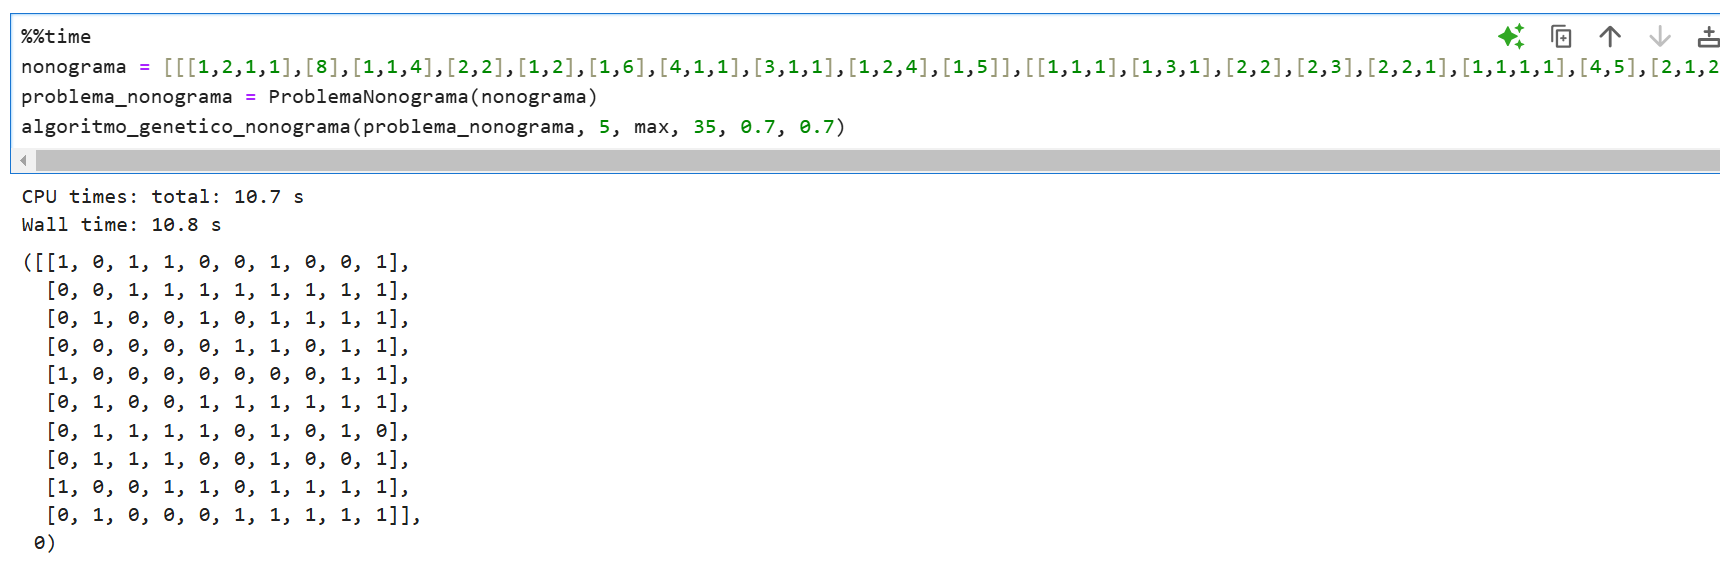

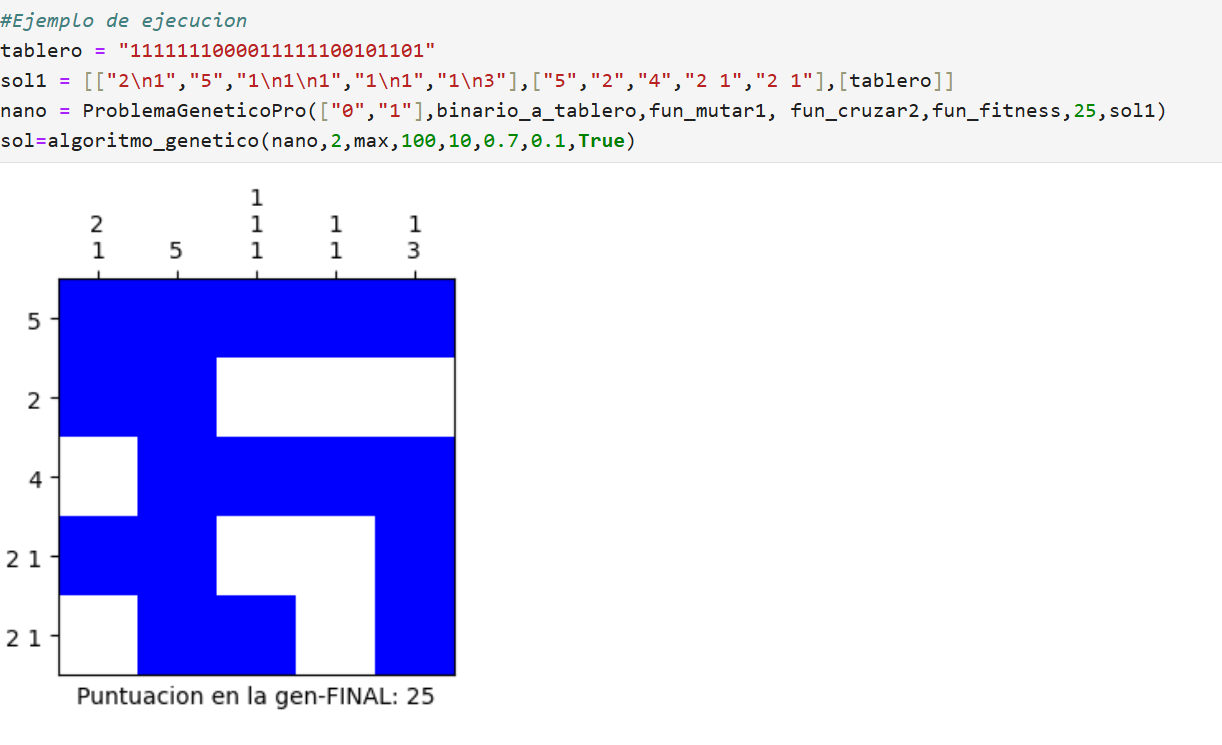